In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha


    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)


light frame

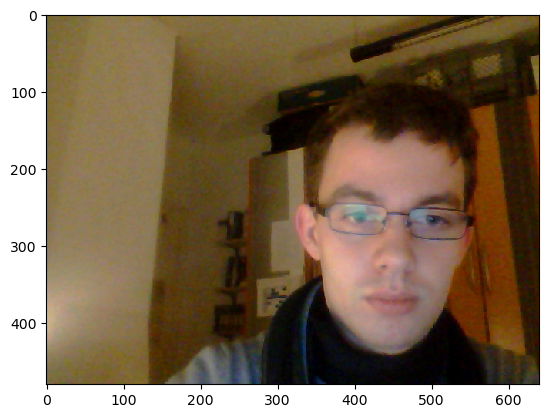

In [8]:
image = cv2.imread('light.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

alpha 1.5454545454545454
beta -1.5454545454545454


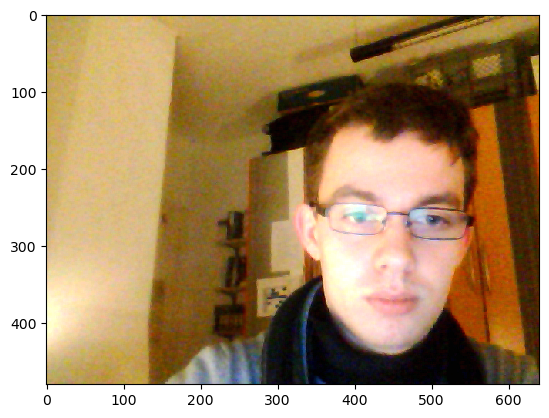

In [9]:
auto_result, alpha, beta = automatic_brightness_and_contrast(image_rgb)
print('alpha', alpha)
print('beta', beta)
plt.imshow(auto_result)
plt.show()

dark frame

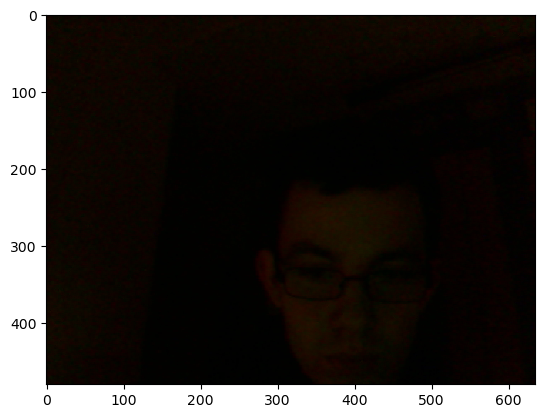

In [10]:
image = cv2.imread('dark.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

alpha 21.25
beta 0.0


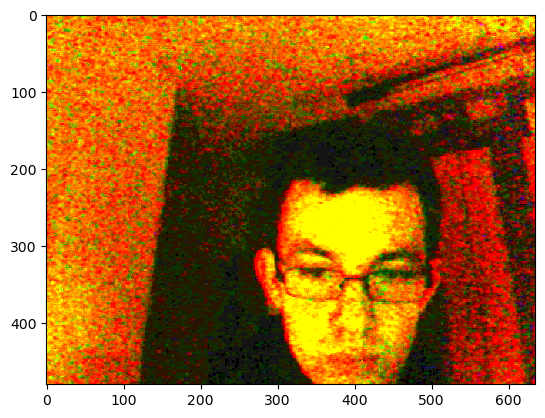

In [11]:
auto_result, alpha, beta = automatic_brightness_and_contrast(image_rgb)
print('alpha', alpha)
print('beta', beta)
plt.imshow(auto_result)
plt.show()